## Data Cleaning

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("dataset/USvideos.csv", encoding='utf-8')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
df.info()

# Check for duplicates and missing values
df.duplicated().sum(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

(np.int64(48),
 video_id                    0
 trending_date               0
 title                       0
 channel_title               0
 category_id                 0
 publish_time                0
 tags                        0
 views                       0
 likes                       0
 dislikes                    0
 comment_count               0
 thumbnail_link              0
 comments_disabled           0
 ratings_disabled            0
 video_error_or_removed      0
 description               570
 dtype: int64)

In [4]:
# Keep unique videos for modeling whether a video trends
df_unique = df.drop_duplicates(subset='video_id')

# Keep all records for trend-duration analysis
df_all = df.copy()

In [5]:
df_all.info(), df_unique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

(None, None)

In [6]:
from datetime import datetime

In [7]:
# Convert trending_date from format 'yy.dd.mm' to datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Convert publish_time to datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')

# Ensure both datetime columns are timezone-naive (remove timezone info)
df['publish_time'] = pd.to_datetime(df['publish_time'], utc=True).dt.tz_localize(None)
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

# Convert boolean-like columns
bool_cols = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']
df[bool_cols] = df[bool_cols].astype(bool)


In [8]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [9]:
# Days between publish and first trending appearance
df['days_to_trend'] = (df['trending_date'] - df['publish_time']).dt.days

# Trend duration per video
trend_duration = df.groupby('video_id')['trending_date'].nunique().reset_index()
trend_duration.columns = ['video_id', 'trend_duration']

# Merge back
df = df.merge(trend_duration, on='video_id', how='left')

# Engagement and like ratios
df['engagement_rate'] = (df['likes'] + df['dislikes'] + df['comment_count']) / df['views']
df['like_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1e-6)


In [10]:
# Remove rows with missing essential data
df = df.dropna(subset=['views', 'likes', 'dislikes', 'comment_count', 'publish_time', 'trending_date'])

# Remove invalid values
df = df[(df['views'] >= 0) & (df['likes'] >= 0) & (df['dislikes'] >= 0) & (df['comment_count'] >= 0)]

In [11]:
import json

# Load JSON file
with open("dataset/US_category_id.json", "r") as f:
    data = json.load(f)

# Extract mapping: category_id → category_name
category_mapping = {int(item['id']): item['snippet']['title'] for item in data['items']}

# Map category names
df['category_name'] = df['category_id'].map(category_mapping)

df.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend,trend_duration,engagement_rate,like_ratio,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0,7,0.102151,0.950970,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0,7,0.047972,0.940521,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1,7,0.049994,0.964729,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0,7,0.037836,0.938550,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1,6,0.072405,0.985181,Entertainment


In [12]:
df.to_csv("cleaned_USvideos_all.csv", index=False)

In [13]:
df.head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,days_to_trend,trend_duration,engagement_rate,like_ratio,category_name
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,0,7,0.102151,0.950970,People & Blogs
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",0,7,0.047972,0.940521,Entertainment
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,1,7,0.049994,0.964729,Comedy
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,0,7,0.037836,0.938550,Entertainment
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,1,6,0.072405,0.985181,Entertainment
5,gHZ1Qz0KiKM,2017-11-14,2 Weeks with iPhone X,iJustine,28,2017-11-13 19:07:23,"ijustine|""week with iPhone X""|""iphone x""|""appl...",119180,9763,511,...,https://i.ytimg.com/vi/gHZ1Qz0KiKM/default.jpg,False,False,False,Using the iPhone for the past two weeks -- her...,0,7,0.098238,0.950263,Science & Technology
6,39idVpFF7NQ,2017-11-14,Roy Moore & Jeff Sessions Cold Open - SNL,Saturday Night Live,24,2017-11-12 05:37:17,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",2103417,15993,2445,...,https://i.ytimg.com/vi/39idVpFF7NQ/default.jpg,False,False,False,Embattled Alabama Senate candidate Roy Moore (...,1,5,0.009702,0.867393,Entertainment
7,nc99ccSXST0,2017-11-14,5 Ice Cream Gadgets put to the Test,CrazyRussianHacker,28,2017-11-12 21:50:37,"5 Ice Cream Gadgets|""Ice Cream""|""Cream Sandwic...",817732,23663,778,...,https://i.ytimg.com/vi/nc99ccSXST0/default.jpg,False,False,False,Ice Cream Pint Combination Lock - http://amzn....,1,6,0.034086,0.968168,Science & Technology
8,jr9QtXwC9vc,2017-11-14,The Greatest Showman | Official Trailer 2 [HD]...,20th Century Fox,1,2017-11-13 14:00:23,"Trailer|""Hugh Jackman""|""Michelle Williams""|""Za...",826059,3543,119,...,https://i.ytimg.com/vi/jr9QtXwC9vc/default.jpg,False,False,False,"Inspired by the imagination of P.T. Barnum, Th...",0,2,0.004845,0.967504,Film & Animation
9,TUmyygCMMGA,2017-11-14,Why the rise of the robots won’t mean the end ...,Vox,25,2017-11-13 13:45:16,"vox.com|""vox""|""explain""|""shift change""|""future...",256426,12654,1363,...,https://i.ytimg.com/vi/TUmyygCMMGA/default.jpg,False,False,False,"For now, at least, we have better things to wo...",0,2,0.063898,0.902761,News & Politics


## Initial Data Analysis

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

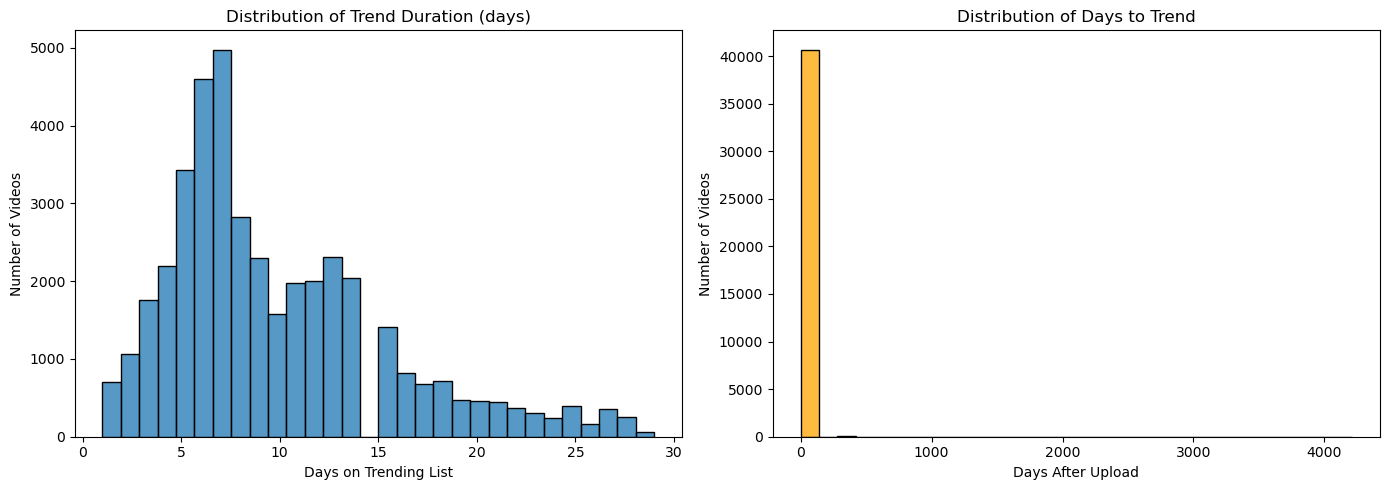

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution of trend_duration
sns.histplot(df['trend_duration'], bins=30, ax=axes[0])
axes[0].set_title("Distribution of Trend Duration (days)")
axes[0].set_xlabel("Days on Trending List")
axes[0].set_ylabel("Number of Videos")

# Distribution of days_to_trend
sns.histplot(df['days_to_trend'], bins=30, ax=axes[1], color='orange')
axes[1].set_title("Distribution of Days to Trend")
axes[1].set_xlabel("Days After Upload")
axes[1].set_ylabel("Number of Videos")

plt.tight_layout()
plt.show()


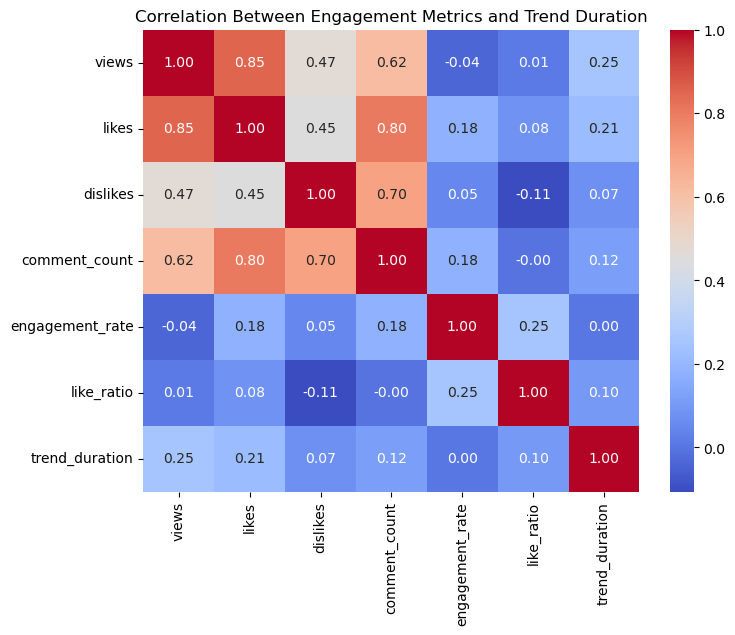

In [16]:
corr_cols = ['views', 'likes', 'dislikes', 'comment_count', 'engagement_rate', 'like_ratio', 'trend_duration']

corr_matrix = df[corr_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Between Engagement Metrics and Trend Duration")
plt.show()


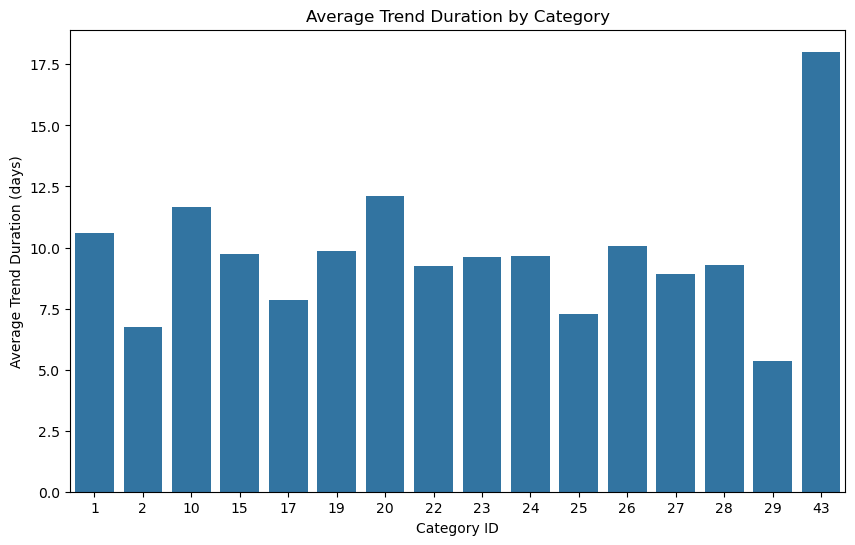

In [17]:
category_trend = df.groupby('category_id')['trend_duration'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_trend.index, y=category_trend.values)
plt.title("Average Trend Duration by Category")
plt.xlabel("Category ID")
plt.ylabel("Average Trend Duration (days)")
plt.show()
